In [13]:
# This Phython 3 environment comes with many helpful analytics libraries installed
# For Example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

import warnings
warnings.filterwarnings("ignore") # ignore all the warnings and the code will still run smoothly as warning are less severe and the code won't stop executing

from pandas.plotting import parallel_coordinates

# Input data files are available in the directory itself and for colab user "/content/file_name"

import os
print(os.listdir("D:\Machine-Learning\Models"))

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', 'World_Happiness_Report_Data_Compilation.ipynb']


In [14]:
# Load data from the csv files
data_2015 = pd.read_csv("2015.csv")
data_2016 = pd.read_csv("2016.csv")
data_2017 = pd.read_csv("2017.csv")

# Column name change
data_2015.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2015.columns]
data_2016.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2016.columns]
data_2017.columns = [each.replace(".", " ") for each in data_2017.columns]
data_2017.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2017.columns]

In [15]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
# getting overview of our data
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [17]:
print("Are there any missing data? :", data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are there any missing data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [18]:
data_2015["Happiness_Score"].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness_Score, Length: 157, dtype: int64

In [19]:
# we found out how many hospitals in country in our data
print("\n\nRegion in Dataset: \n")
print("There are {} differnet values \n". format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())



Region in Dataset: 

There are 10 differnet values 

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [20]:
region_lists = list(data_2015['Region'].unique())
region_happiness_ratio = []
for each in region_lists:
    region = data_2015[data_2015['Region'] == each]
    region_happiness_rate = sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

data = pd.DataFrame({'region': region_lists, 'region_happiness_ratio': region_happiness_ratio})
new_index = (data['region_happiness_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


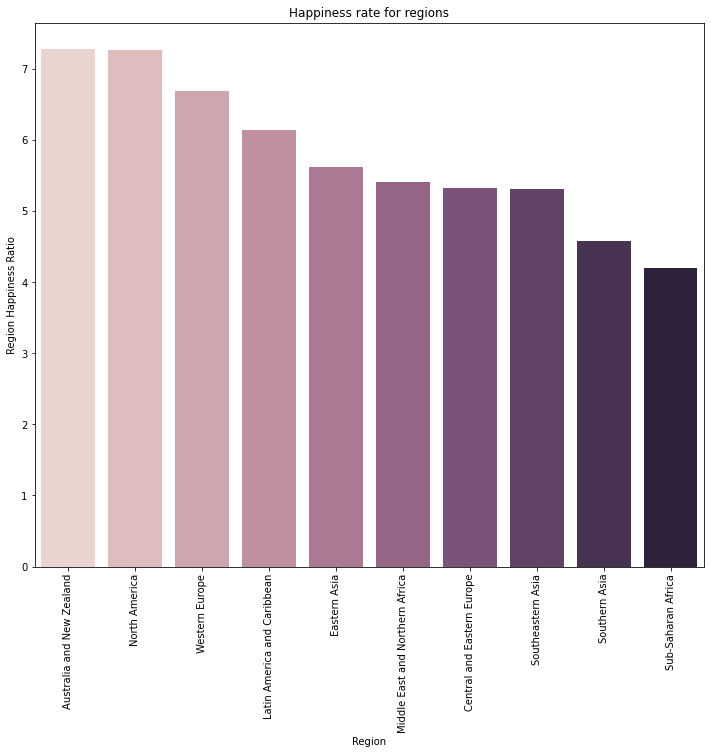

In [21]:
# Visualization
# Create a new figure and make the size (12, 10)
plt.figure(figsize=(12, 10))
sns.barplot(x = sorted_data['region'], y = sorted_data['region_happiness_ratio'], palette = sns.cubehelix_palette(len(sorted_data['region'])))

# Place the region names at a 90-degree angle.
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()